## Import Modules

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
from sklearn.metrics import silhouette_score
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Load the Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# statistical info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Exploratory Data Analysis

<Axes: xlabel='count', ylabel='Gender'>

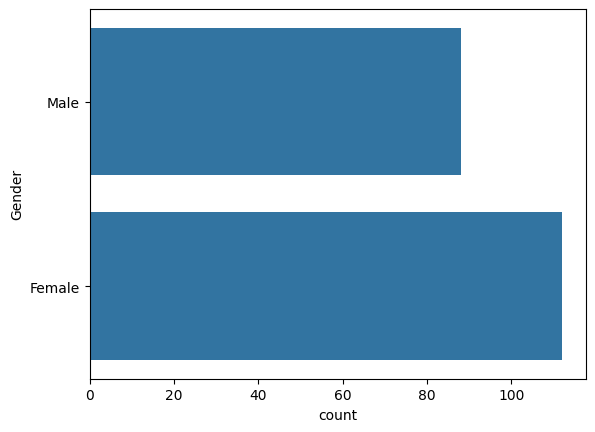

In [5]:
sns.countplot(df['Gender'])
#More females than males

<Axes: xlabel='Age', ylabel='Density'>

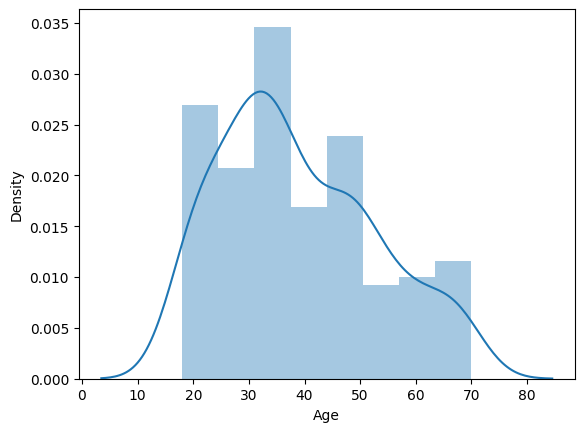

In [6]:
sns.distplot(df['Age'])
# The data is right-skewed, meaning more people are in the younger age groups.
# A peak occurs around 30–40 years, suggesting a higher concentration of individuals in this age range.
# There is a long tail towards older ages, indicating fewer people in that group

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

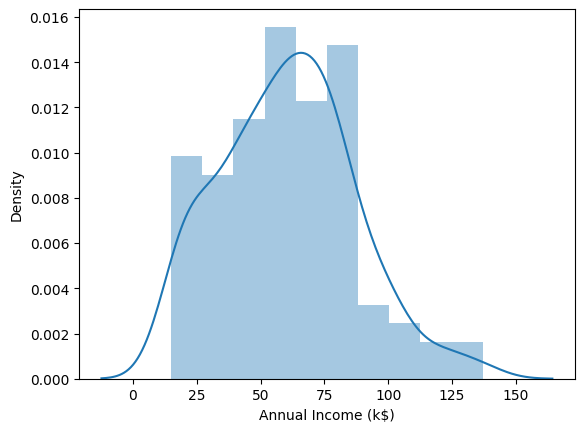

In [7]:
sns.distplot(df['Annual Income (k$)'])
# The income distribution is right-skewed (positively skewed), meaning most people earn lower to mid-range salaries, while fewer earn higher incomes.
# The peak occurs around $50k–$75k, suggesting that most individuals fall within this income range.
# The tail extends beyond $100k, indicating the presence of high-income individuals but in much smaller numbers.

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

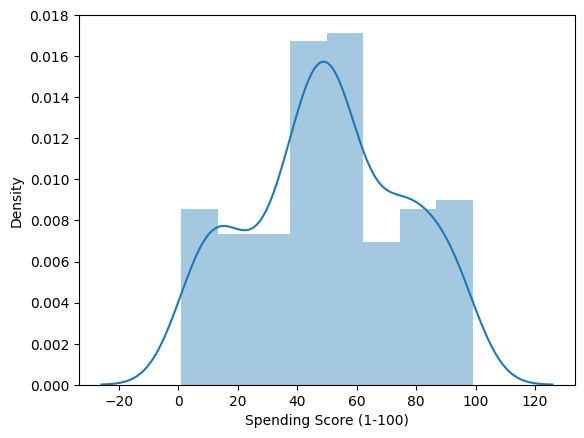

In [8]:
sns.distplot(df['Spending Score (1-100)'])
# The bimodal shape suggests that dataset might contain two distinct groups of customers with different spending habits.
# This could indicate two customer segments in your data—e.g., low spenders vs. high spenders.

## Correlation Matrix

<Axes: >

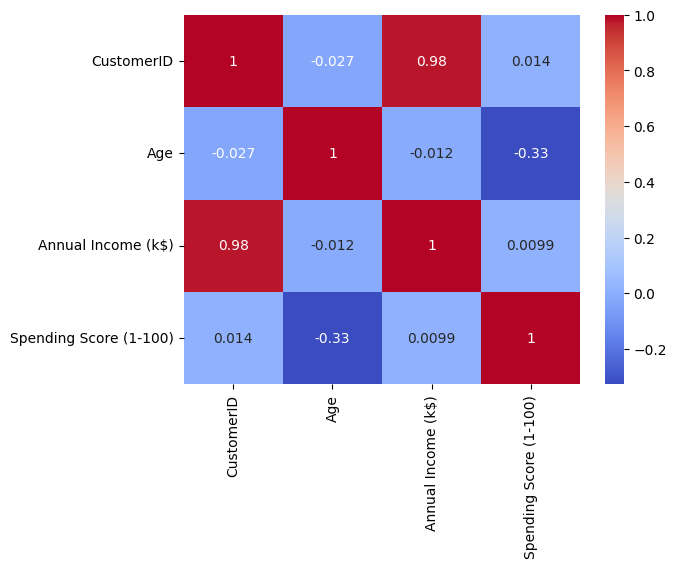

In [9]:
int_df = df.select_dtypes(include=['int64'])  

# Compute correlation on integer columns only
corr = int_df.corr()  
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [296]:
from scipy.stats.mstats import winsorize

def winsorize_data(df, columns, limits=(0.05, 0.05)):
    df_copy = df.copy()
    for col in columns:
        df_copy[col] = winsorize(df_copy[col], limits=limits)
    return df_copy  

## Clustering

In [308]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,Clusters3d
0,1,Male,19,15,39,0,-1
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,1,-1
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,-1


In [320]:
# cluster on 2 features
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


array([[-1.73899919, -0.43480148,  1.85541956],
       [-1.73899919,  1.19570407, -1.48767874],
       [-1.70082976, -1.71591298,  1.85541956],
       [-1.70082976,  1.04041783, -1.48767874],
       [-1.66266033, -0.39597992,  1.85541956],
       [-1.66266033,  1.00159627, -1.48767874],
       [-1.62449091, -1.71591298,  1.85541956],
       [-1.62449091,  1.70038436, -1.48767874],
       [-1.58632148, -1.83237767,  1.85541956],
       [-1.58632148,  0.84631002, -1.48767874],
       [-1.58632148, -1.4053405 ,  1.85541956],
       [-1.58632148,  1.89449216, -1.48767874],
       [-1.54815205, -1.36651894,  1.85541956],
       [-1.54815205,  1.04041783, -1.48767874],
       [-1.54815205, -1.44416206,  1.85541956],
       [-1.54815205,  1.11806095, -1.48767874],
       [-1.50998262, -0.59008772,  1.85541956],
       [-1.50998262,  0.61338066, -1.48767874],
       [-1.43364376, -0.82301709,  1.85541956],
       [-1.43364376,  1.8556706 , -1.48767874],
       [-1.39547433, -0.59008772,  1.855

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

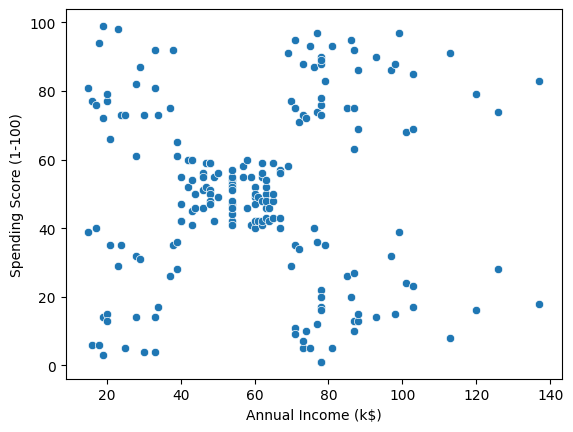

In [321]:
# scatter plot
sns.scatterplot(x=df1['Annual Income (k$)'], y=df1['Spending Score (1-100)'])

In [312]:
from sklearn.cluster import KMeans
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

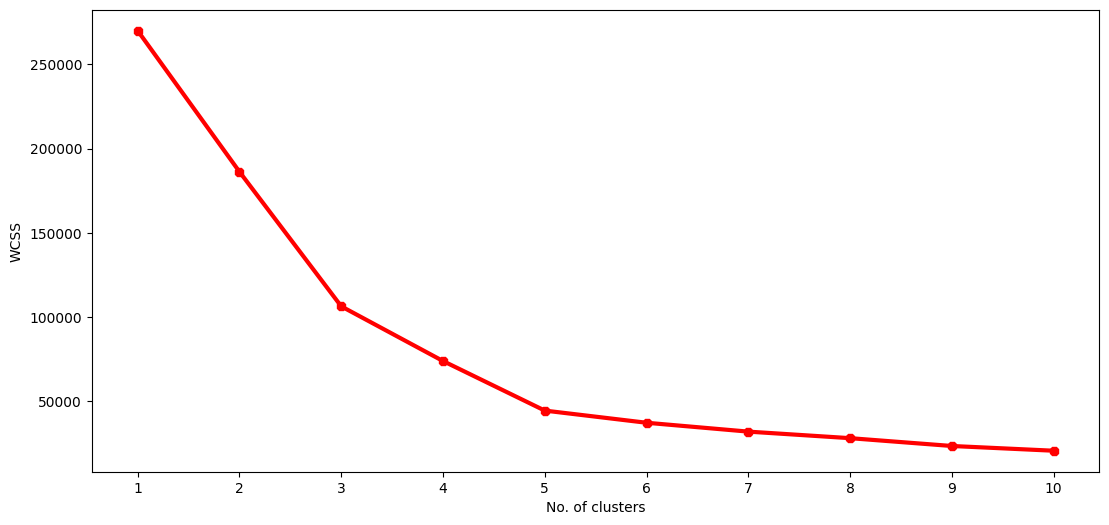

In [313]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [314]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


In [315]:
silhouette_score(df1, y)

np.float64(0.5546550526511389)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

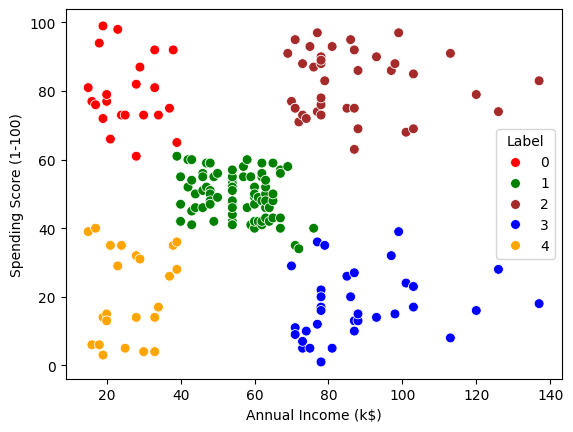

In [316]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Label', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])

# **Customer Segmentation Analysis using Clustering**

## 📊 Overview
The scatter plot represents customer segmentation based on **Annual Income (k$)** and **Spending Score (1-100)** using a clustering algorithm (likely K-Means or another partition-based clustering method). The data points are colored according to their assigned cluster labels.

## 📌 Observations
### **Distinct Customer Groups**
- The clustering algorithm has successfully divided the data into **5 distinct clusters** (represented by different colors).
- Silhouette Score of 0.554 indicating a good speration of clusters
- Each cluster represents a unique group of customers with similar spending behaviors and income levels.

### **Cluster Interpretations**
- **Cluster 0 (Red)**: High Spending Score, Low to Mid Income – Likely **high-value customers**.
- **Cluster 1 (Green)**: Mid Spending Score, Mid Income – Possibly **balanced or average customers**.
- **Cluster 2 (Brown/Maroon)**: High Spending Score, High Income – Likely **affluent customers with high purchasing power**.
- **Cluster 3 (Blue)**: Low Spending Score, High Income – These could be **conservative spenders** or individuals saving their money.
- **Cluster 4 (Orange)**: Low Spending Score, Low Income – Likely **budget-conscious or low-engagement customers**.

### **Cluster Density and Separation**
- The clusters appear **well-separated**, indicating a **good clustering outcome**.
- There are **no significant overlapping clusters**, which suggests that the chosen clustering method is effective.
- Customers with **similar spending habits and income levels** are grouped together.

## 📈 Insights for Business Strategy
### **Target High-Spending Customers (Clusters 0 & 2)**
- Customers in **Clusters 0 and 2** show high spending tendencies.
- These segments should be the focus for **premium product marketing, loyalty programs, and personalized offers**.

### **Engage Low-Spending High-Income Customers (Cluster 3)**
- Despite high income, **Cluster 3 customers spend less**.
- Strategies like **targeted promotions, exclusive discounts, or personalized recommendations** might encourage more spending.

### **Improve Engagement for Low-Income, Low-Spending Customers (Cluster 4)**
- This segment may require **budget-friendly offerings** or **subscription-based models** to increase engagement.


In [18]:
# cluster on 3 features
df2 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [19]:
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

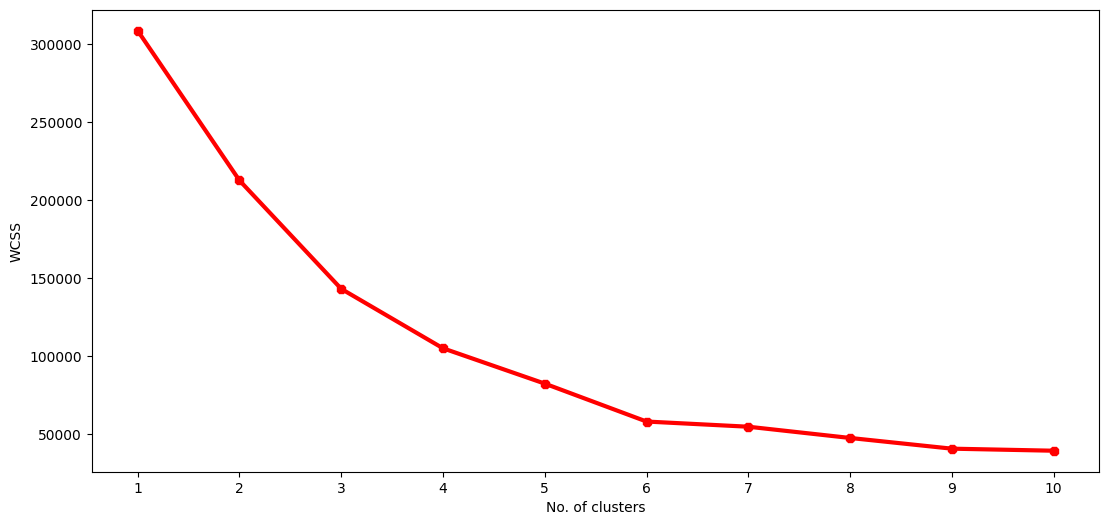

In [20]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [21]:
km = KMeans(n_clusters=5)
km.fit(df2)
y = km.predict(df2)
df2['Label'] = y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,4
1,15,81,21,3
2,16,6,20,4
3,16,77,23,3
4,17,40,31,4


In [22]:
silhouette_score(df2,y)

np.float64(0.4448928509007986)

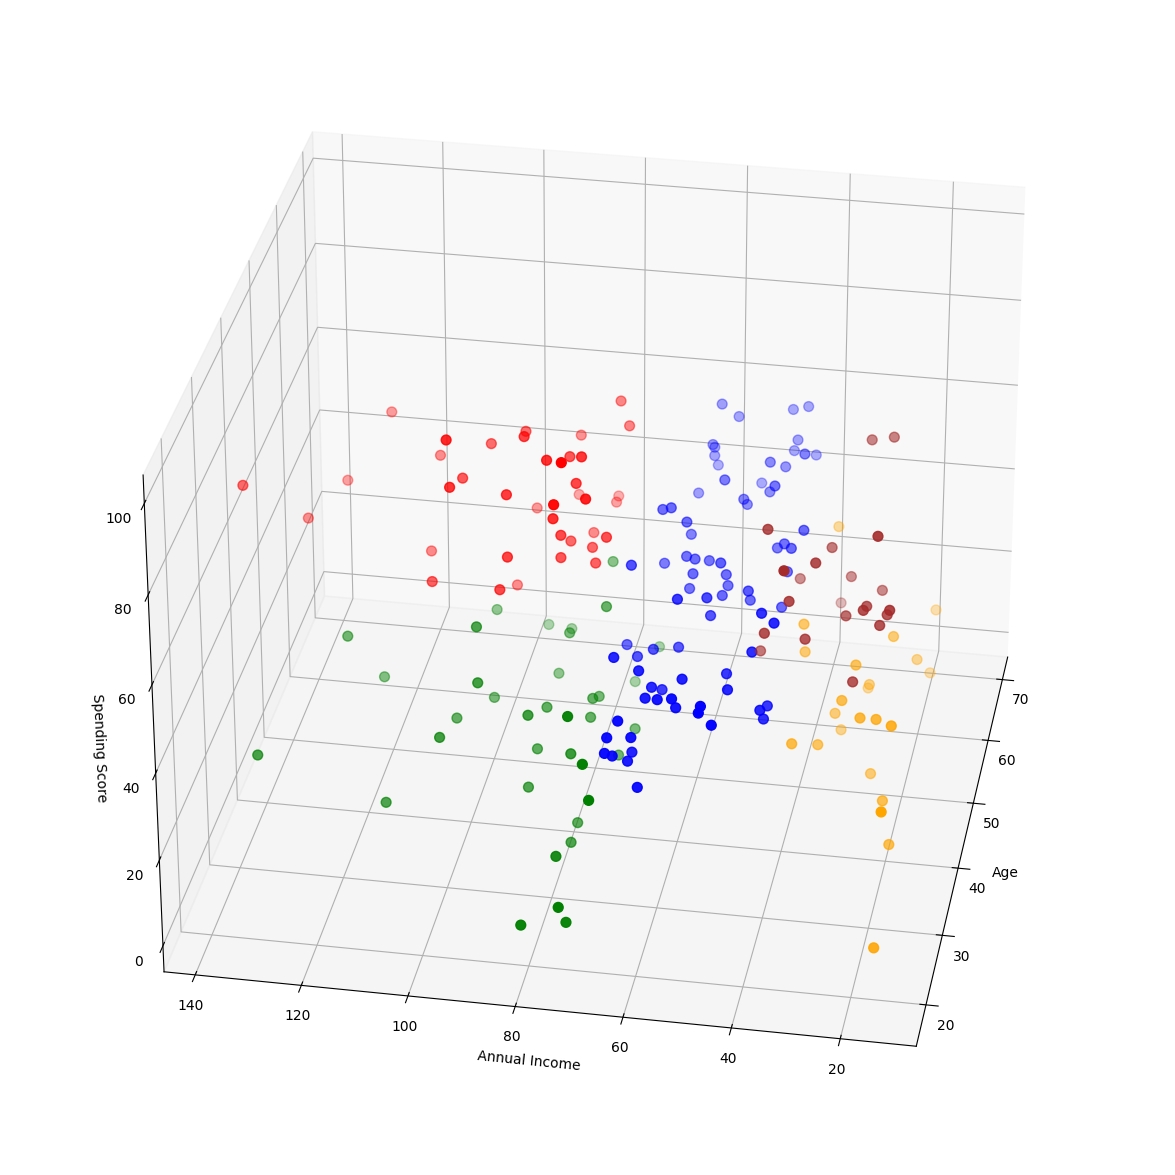

In [23]:
# 3d scatter plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='red', s=50)
ax.scatter(df2['Age'][df2['Label']==1], df2['Annual Income (k$)'][df2['Label']==1], df2['Spending Score (1-100)'][df2['Label']==1], c='green', s=50)
ax.scatter(df2['Age'][df2['Label']==2], df2['Annual Income (k$)'][df2['Label']==2], df2['Spending Score (1-100)'][df2['Label']==2], c='blue', s=50)
ax.scatter(df2['Age'][df2['Label']==3], df2['Annual Income (k$)'][df2['Label']==3], df2['Spending Score (1-100)'][df2['Label']==3], c='brown', s=50)
ax.scatter(df2['Age'][df2['Label']==4], df2['Annual Income (k$)'][df2['Label']==4], df2['Spending Score (1-100)'][df2['Label']==4], c='orange', s=50)
ax.view_init(30, 190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

In [25]:
arr_df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [323]:
scaler=StandardScaler()
scaled=scaler.fit_transform(arr_df1)

#### Implementing DBSCAN

In [324]:
db=DBSCAN(eps=0.4,min_samples=5)
labels=db.fit_predict(scaled)

In [325]:
silhouette_score(scaled, labels)

np.float64(0.41325830390002166)

In [236]:
df['Clusters']=labels

In [237]:
df['Clusters'].value_counts()

Clusters
 0    115
 2     32
 3     27
-1     15
 1     11
Name: count, dtype: int64

In [238]:
from matplotlib import pyplot as plt

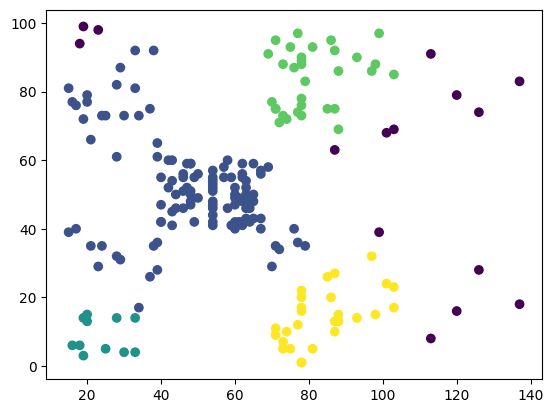

In [330]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Clusters'])

In [82]:
arr_df2 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].values

In [84]:
scaled_df2=scaler.fit_transform(arr_df2)

In [291]:
db=DBSCAN(eps=0.5,min_samples=7)
threedlabels=db.fit_predict(scaled_df2)

In [292]:
silhouette_score(scaled_df2, threedlabels)

np.float64(0.2236154132178232)

In [293]:
df['Clusters3d']=threedlabels

In [294]:
df['Clusters3d'].value_counts()

Clusters3d
-1    79
 1    48
 3    30
 2    29
 0    14
Name: count, dtype: int64

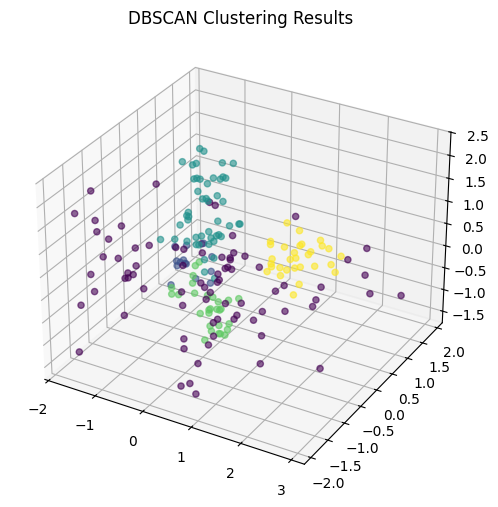

In [295]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_df2[:, 0], scaled_df2[:, 1], scaled_df2[:, 2], 
           c=threedlabels, cmap='viridis', alpha=0.6)

plt.title("DBSCAN Clustering Results")
plt.show()


# **Comparison of Customer Segmentation: K-Means vs. DBSCAN**

## **Overview**
This analysis compares the performance of **K-Means** and **DBSCAN** clustering algorithms on customer segmentation using **Annual Income** and **Spending Score**. The effectiveness of each algorithm is evaluated using the **silhouette score**, which measures the separation and cohesion of clusters.

## **1️⃣ K-Means Clustering **
- **Silhouette Score:** **0.554** (Higher, indicating better clustering)
- **Clusters Identified:** **5**
- **Characteristics:**
  - Well-defined and **compact clusters**.
  - Customers are grouped effectively based on spending behavior and income.
  - **No significant noise**; every data point is assigned to a cluster.
  - Works best for structured, spherical clusters.

## **2️⃣ DBSCAN Clustering **
- **Silhouette Score:** **0.41** (Lower, indicating less distinct clusters)
- **Clusters Identified:** **Multiple, including noise points**
- **Characteristics:**
  - DBSCAN can **detect outliers** (noise points), which may be useful in real-world applications.
  - The clusters are **less compact** compared to K-Means.
  - Handles **non-uniform density** better but may struggle with high-dimensional or overlapping data.
  - Some **data points remain unclustered**, as DBSCAN does not force every point into a cluster.

---

## **🔍 Key Insights**
| Feature            | K-Means 📊      | DBSCAN 📉      |
|--------------------|---------------|---------------|
| **Silhouette Score** | **0.554** (Higher) | **0.41** (Lower) |
| **Cluster Shape**   | Compact, spherical | Arbitrary |
| **Outlier Handling** | Poor (no noise detection) | Good (identifies noise) |
| **Performance on High-Density Data** | Works well | Handles varying densities |
| **Cluster Compactness** | High | Low |
| **Best Use Case** | Structured and well-separated clusters | Data with noise and varying density |

---

## **🏆 Final Verdict**
- **K-Means** is superior when clusters are well-separated and compact.
- **DBSCAN** is more robust for detecting outliers and handling irregularly shaped clusters.
- If outliers and varying densities are important, **DBSCAN** is preferable.
- If distinct, well-formed clusters are needed, **K-Means** is the better choice.

---
